# Task - Computational Inteligence
## Name : M Labib Alfaraby
## NRP   : 5025201083
## Class : CI - E

In [112]:
! pip install data-science-utils --user

### 1. After you practice with the example, try running k-means using several different values of parameters and see if you get different results.

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality, plot_loss_vs_cluster_number
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
df_income = pd.read_csv('data/clustering.csv')
df_income

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [75]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [114]:
df_income.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


In [77]:
scaler = StandardScaler()

column_names = df_income.columns.tolist()

print(column_names)

['INCOME', 'SPEND']


In [115]:
df_income[column_names] = scaler.fit_transform(df_income[column_names])
df_income.sort_index(inplace = True)
df_income


,INCOME,SPEND
0,-0.253492,0.015443
1,0.097607,1.633471
2,-0.852427,0.977514
3,-0.191534,1.239897
4,2.245510,0.583939
...,...,...
298,-0.088269,-1.165281
299,0.386748,-0.771706
300,-1.079609,-0.378132
301,-2.360090,-1.515125


Text(0, 0.5, 'Annual Spend')

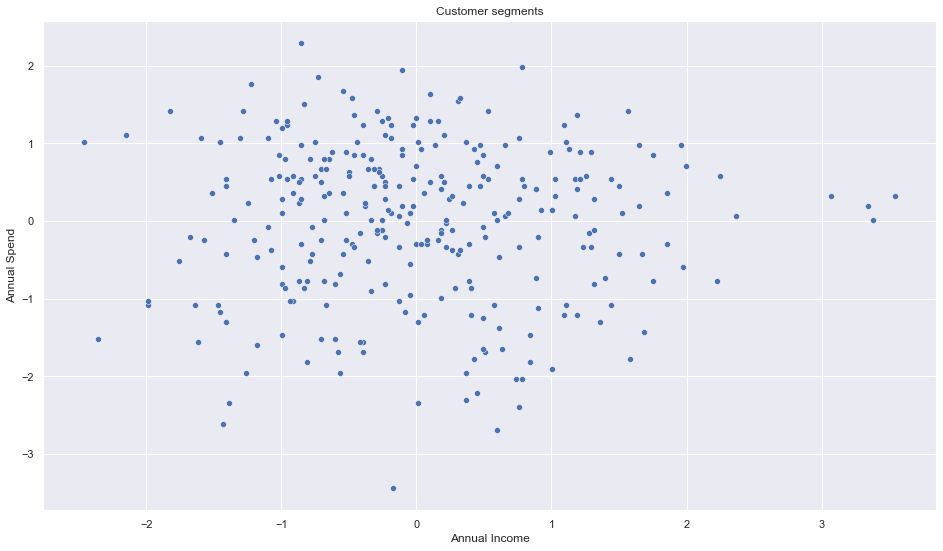

In [116]:
sns.set()
plt.rcParams['figure.figsize'] = (16,9)

sns.scatterplot(x = 'INCOME', y = 'SPEND', data = df_income)
plt.title('Customer segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

In [130]:
kmeans = KMeans(n_clusters = 3,init='k-means++', max_iter=100,n_init=100,random_state = 0)
income = df_income[['INCOME','SPEND']]
cluster = kmeans.fit_predict(income)
cluster.sum()

255

In [131]:
center_cluster = kmeans.cluster_centers_
center_cluster

array([[-0.47379016,  0.68629408],
       [ 1.29767927,  0.11106682],
       [-0.35492115, -1.14487328]])

In [132]:
df_income['cluster'] = cluster
df_income

,INCOME,SPEND,cluster
0,-0.253492,0.015443,0
1,0.097607,1.633471,0
2,-0.852427,0.977514,0
3,-0.191534,1.239897,0
4,2.245510,0.583939,1
...,...,...,...
298,-0.088269,-1.165281,2
299,0.386748,-0.771706,2
300,-1.079609,-0.378132,2
301,-2.360090,-1.515125,2


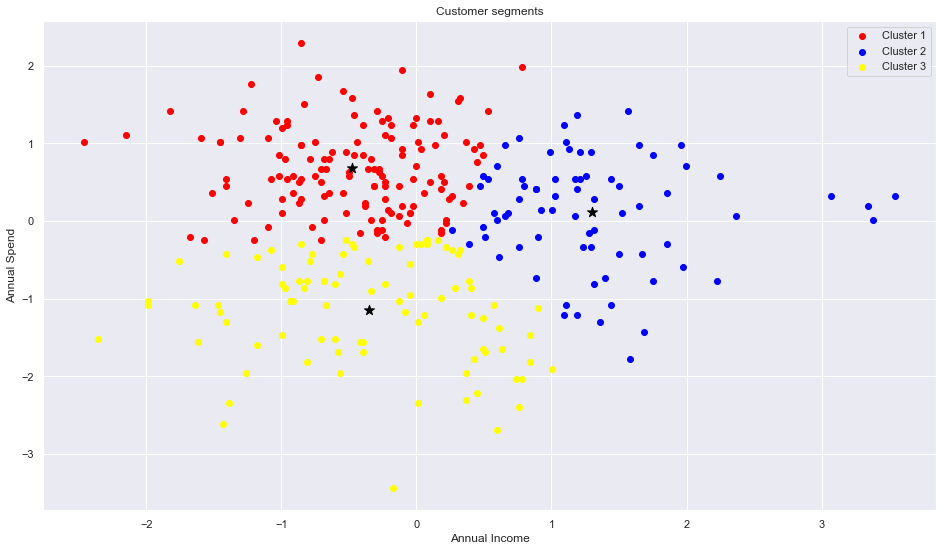

In [133]:
df_income1 = df_income[df_income.cluster == 0]
df_income2 = df_income[df_income.cluster == 1]
df_income3 = df_income[df_income.cluster == 2]
# df_income4 = df_income[df_income.cluster == 3]

plt.scatter(df_income1['INCOME'], df_income1['SPEND'], color='red', label='Cluster 1')
plt.scatter(df_income2['INCOME'], df_income2['SPEND'], color='blue', label='Cluster 2')
plt.scatter(df_income3['INCOME'], df_income3['SPEND'], color='yellow', label='Cluster 3')
# plt.scatter(df_income4['INCOME'], df_income4['SPEND'], color='green', label='Cluster 4')
plt.scatter(center_cluster[:,0], center_cluster[:,1], color='black', marker='*', s=110)

plt.title('Customer segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()

In [121]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_income[['INCOME','SPEND']])
    sse.append(km.inertia_)

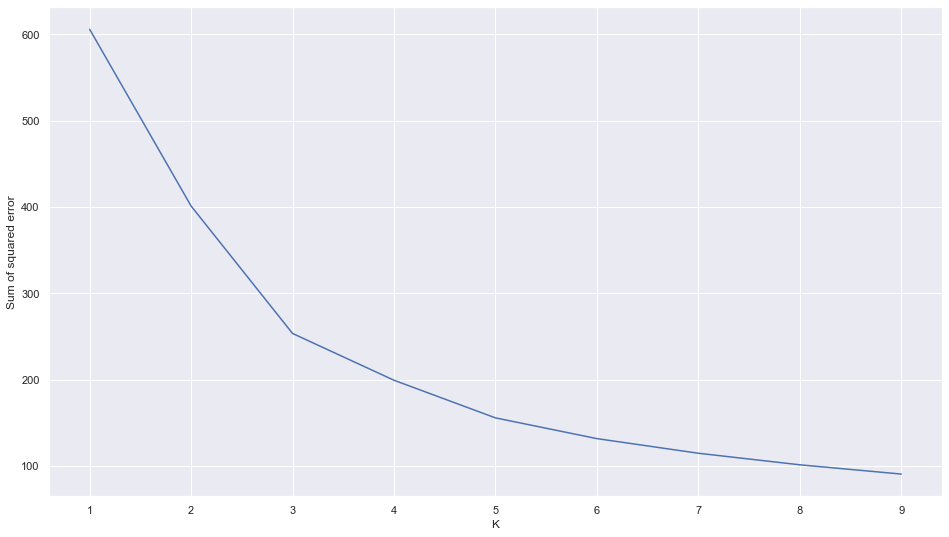

In [122]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### 2. Interpret the results:

#### a. Plot the cluster cardinality for all clusters; which cluster has the highest number of cardinalities? (Cluster cardinality is the number of examples per cluster)

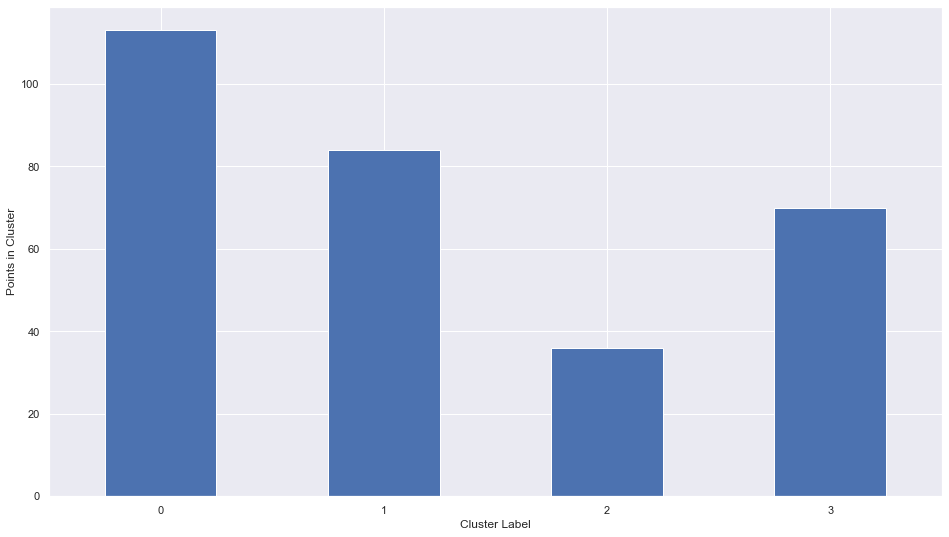

In [123]:
plot_cluster_cardinality(kmeans.labels_)

plt.show()

#### Cluster 0 has most cardinalities 

#### b. Similar to cardinality, check how the magnitude varies across the clusters; which cluster has the highest magnitude? (Cluster magnitude is the sum of distances from all examples to the centroid of the cluster) 

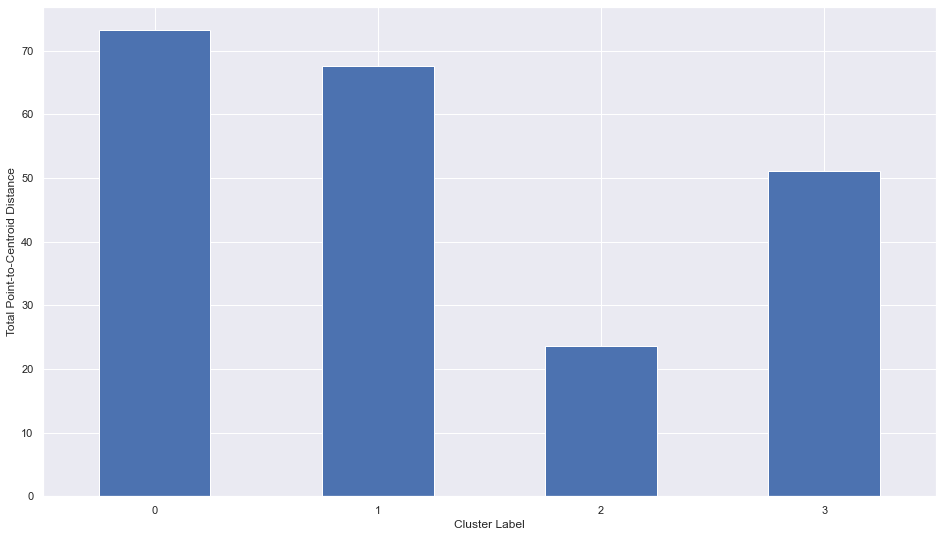

In [124]:
plot_cluster_magnitude(income, kmeans.labels_, kmeans.cluster_centers_, euclidean)
plt.show()

#### cluster o has the highest magnitude 

#### c. Find anomalous clusters by plotting magnitude against cardinality 

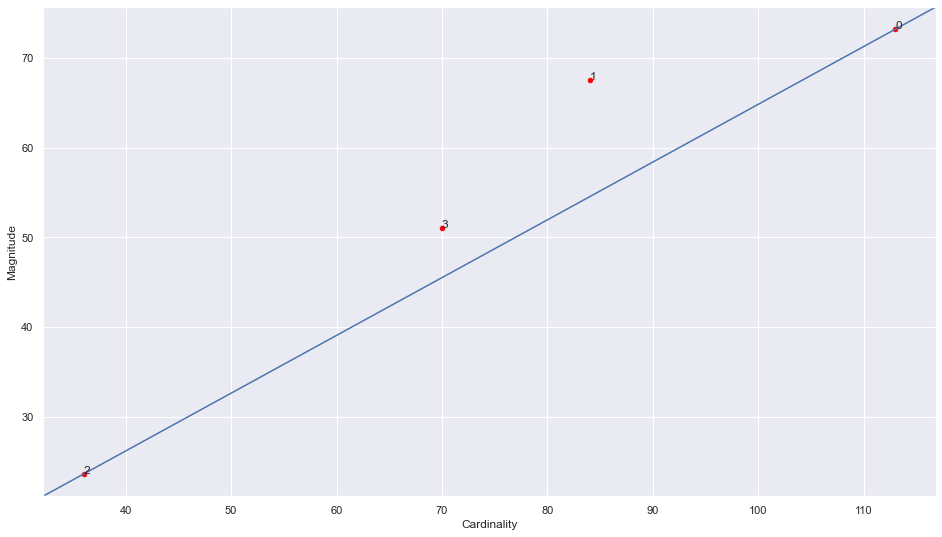

In [125]:
plot_magnitude_vs_cardinality(income, kmeans.labels_, kmeans.cluster_centers_, euclidean, color='red')

plt.show()

#### In the above figure, we can conclude that the anomalous clusters is cluster 1 because its cardinality doesn't correlate to its magnitude according to the distance of location  (cardinality, magnitude) to the slanted line.

### 3. What is the optimal number of clusters for the data provided? 

<AxesSubplot:title={'center':'Loss vs Clusters Used'}, xlabel='Number of clusters', ylabel='Total Point-to-Centroid Distance'>

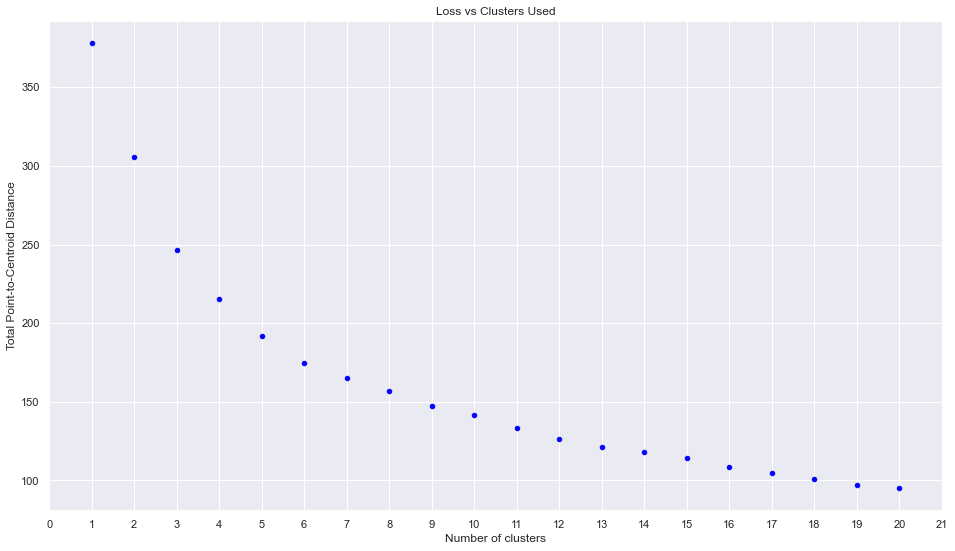

In [129]:
plot_loss_vs_cluster_number(income, 1, 20, euclidean, color='blue')

#### According to elbow method which has already plot on number 2. we can see that the bend point is at cluster 3. It indicate the optimal number of cluster.